### 가축사육현황 EDA
---


데이터분석 목적

- “분기별 가축사육현황”
- ‘마리수-번식우’, ‘번식우’,‘마리수’,’번식우가 아닌 소 중 1세 미만(암,수) 제외’에 해당하는 값을 사용할 예정.
- 번식우: 기르기 위한 소이기 때문에 제외한 값도 확인해보고자함
- 1세 미만(암,수)는 출하 월령에 미치지 못하기 때문.
- ‘마리수-번식우’,’마리수’ 각각 y값과 EDA


데이터 셋 분석 기간
- 2013.01.01 ~ 2018.12.31

In [137]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [138]:
breeding_status_data = pd.read_csv("./data/02. 가축사육현황.csv", encoding="cp949")
target_data = pd.read_csv("./data/01. 축산물 실시간 경매시황중계정보.csv", encoding="cp949")

print(f"Breeding status Columns \n  {breeding_status_data.columns}")
print()
print(f"Target data columns \n {target_data.columns}")

Breeding status Columns 
  Index(['Unnamed: 0', '연도', '월', '마리수', '번식우', '1세미만(암)', '1세미만(수)', '1~2세(암)',
       '1~2세(수)', '2세이상(암)', '2세이상(수)'],
      dtype='object')

Target data columns 
 Index(['경매시간', '경매기준시분초', '경매 구분', '경매 구분 명', '도매시장코드', '도매시장명', '한우 평균경매 금액',
       '한우 평균경매 금액_상승하강', '한우 1B+ 경매단가', '한우 3B 경매단가', '한우 경매 예상 두수',
       '한우 경매 낙찰 두수', '육우 경매 금액', '육우 전날 경매금액 차이', '육우 경매 예상 두수', '육우 경매 두수',
       '돼지 박피 경매 금액', '돼지 박피 전날 경매금액 차이', '돼지 박피 경매 두수', '돼지 탕박 경매 금액',
       '돼지 탕박 전날 경매금액 차이', '돼지 탕박 경매 두수', '돼지 경매 두수'],
      dtype='object')


In [139]:
# Create Data Profile Report
"""
breeding_data_profile = status_df.profile_report()
breeding_data_profile.to_file("./data/breeding_status_report.html")

target_data_profile = target_data.profile_report()
target_data_profile.to_file("./data/축산물_실시간_경매시황중계정보.html")
"""

'\nbreeding_data_profile = status_df.profile_report()\nbreeding_data_profile.to_file("./data/breeding_status_report.html")\n\ntarget_data_profile = target_data.profile_report()\ntarget_data_profile.to_file("./data/축산물_실시간_경매시황중계정보.html")\n'

In [140]:
target_data = target_data[target_data["도매시장명"] == "전국"]
target_data = target_data[target_data["경매 구분 명"] == "경매용+지육상장"]
target_data = target_data[["경매시간", "경매기준시분초", "한우 평균경매 금액"]]
target_data = target_data[target_data["한우 평균경매 금액"] != 0]
sort_target_data = target_data.sort_values(by=["경매시간", "경매기준시분초"]) # Sort descending by Time
sort_target_data[["경매시간", "경매기준시분초"]] = sort_target_data[["경매시간", "경매기준시분초"]].astype("str")
print(f"Target Data shape : {target_data.shape}")
sort_target_data.head()

Target Data shape : (720, 3)


,경매시간,경매기준시분초,한우 평균경매 금액
34896,20130102,221544,13203
34867,20130103,221545,13743
34811,20130104,221545,13945
34666,20130107,221547,13470
34634,20130108,221548,14040


In [141]:
print("Target Data Statistics Summary")
sort_target_data.describe()

Target Data Statistics Summary


,한우 평균경매 금액
count,720.000000
mean,14321.930556
std,2078.246107
min,8100.000000
25%,13190.000000
50%,14034.000000
75%,15074.250000
max,20019.000000


In [142]:
print("Target Data info")
sort_target_data.info()

Target Data info
<class 'pandas.core.frame.DataFrame'>
Int64Index: 720 entries, 34896 to 61
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   경매시간        720 non-null    object
 1   경매기준시분초     720 non-null    object
 2   한우 평균경매 금액  720 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 22.5+ KB


In [143]:
print("livestock status Data info")
breeding_status_data.info()

livestock status Data info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  80 non-null     int64 
 1   연도          80 non-null     int64 
 2   월           80 non-null     int64 
 3   마리수         80 non-null     object
 4   번식우         80 non-null     object
 5   1세미만(암)     80 non-null     int64 
 6   1세미만(수)     80 non-null     int64 
 7   1~2세(암)     80 non-null     int64 
 8   1~2세(수)     80 non-null     int64 
 9   2세이상(암)     80 non-null     object
 10  2세이상(수)     80 non-null     int64 
dtypes: int64(8), object(3)
memory usage: 7.0+ KB


#### EDA을 위한 데이터 전처리

In [144]:
def remove_semi(df):
    columns = list(df.columns)
    for c in columns:
        if df[c].dtype != int:
            df[c] = df[c].apply(lambda x : str(x).replace(",",""))
    return df

In [145]:
# Drop Unnamed field
status_df = breeding_status_data[['연도', '월', '마리수', '번식우', '1세미만(암)', '1세미만(수)', '1~2세(암)',
       '1~2세(수)', '2세이상(암)', '2세이상(수)']]
# convert string value to interger
status_df = remove_semi(status_df)

# fit date range
status_df = status_df[status_df["연도"] >= 2013]
status_df["날짜"] = status_df["연도"].astype("str") + "-" + status_df["월"].astype("str")
status_df[["연도", "월"]] = status_df[["연도", "월"]].astype("str")

/Users/hongnadan/opt/anaconda3/envs/livestock-solution-project/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [146]:
status_df.head()

,연도,월,마리수,번식우,1세미만(암),1세미만(수),1~2세(암),1~2세(수),2세이상(암),2세이상(수),날짜
52,2013,3,2966,1580,396,470,409,479,996,216,2013-3
53,2013,6,3064,1590,383,459,412,491,1037,281,2013-6
54,2013,9,3043,1563,369,438,419,496,1024,296,2013-9
55,2013,12,2918,1500,367,434,420,491,956,251,2013-12
56,2014,3,3083,1467,378,457,442,514,1027,266,2014-3


### 추가 Columns 생성
---

1. 번식우 아닌 소
2. 번식우 아닌 소 중 세 미만(암,수) 제외

In [174]:
status_df.columns

Index(['연도', '월', '마리수', '번식우', '1세미만(암)', '1세미만(수)', '1~2세(암)', '1~2세(수)',
       '2세이상(암)', '2세이상(수)', '날짜'],
      dtype='object')

In [177]:
status_df["번식 우 아닌 소"] = status_df["마리수"] - status_df["번식우"]
status_df["번식우 아닌 소 중 1세 미만(암,수) 제외"] = status_df["1~2세(암)"] + status_df["1~2세(수)"] + status_df["2세이상(암)"]  + status_df["2세이상(수)"]
    
status_df.head()

,연도,월,마리수,번식우,1세미만(암),1세미만(수),1~2세(암),1~2세(수),2세이상(암),2세이상(수),날짜,번식 우 아닌 소,"번식우 아닌 소 중 1세 미만(암,수) 제외"
52,2013,3,2966,1580,396,470,409,479,996,216,2013-3,1386,2100
53,2013,6,3064,1590,383,459,412,491,1037,281,2013-6,1474,2221
54,2013,9,3043,1563,369,438,419,496,1024,296,2013-9,1480,2235
55,2013,12,2918,1500,367,434,420,491,956,251,2013-12,1418,2118
56,2014,3,3083,1467,378,457,442,514,1027,266,2014-3,1616,2249


### LiveStock Data EDA
---

In [178]:
print(f"LiveStock Status Data Shape : {status_df.shape}")
status_df.head()

LiveStock Status Data Shape : (28, 13)


,연도,월,마리수,번식우,1세미만(암),1세미만(수),1~2세(암),1~2세(수),2세이상(암),2세이상(수),날짜,번식 우 아닌 소,"번식우 아닌 소 중 1세 미만(암,수) 제외"
52,2013,3,2966,1580,396,470,409,479,996,216,2013-3,1386,2100
53,2013,6,3064,1590,383,459,412,491,1037,281,2013-6,1474,2221
54,2013,9,3043,1563,369,438,419,496,1024,296,2013-9,1480,2235
55,2013,12,2918,1500,367,434,420,491,956,251,2013-12,1418,2118
56,2014,3,3083,1467,378,457,442,514,1027,266,2014-3,1616,2249


In [179]:
print("LiveStock Data Statistics Summary")
status_df.describe()

LiveStock Data Statistics Summary


,마리수,번식우,1세미만(암),1세미만(수),1~2세(암),1~2세(수),2세이상(암),2세이상(수),번식 우 아닌 소,"번식우 아닌 소 중 1세 미만(암,수) 제외"
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,3038.928571,1608.857143,394.500000,477.857143,402.714286,471.178571,1043.107143,249.678571,1430.071429,2166.678571
std,110.832850,135.560760,23.359509,30.358005,14.777002,18.320306,46.945468,42.816623,101.993801,89.556956
min,2821.000000,1415.000000,362.000000,434.000000,376.000000,435.000000,956.000000,172.000000,1279.000000,1981.000000
25%,2965.250000,1473.500000,376.750000,456.500000,392.500000,462.000000,1006.500000,220.250000,1363.750000,2109.000000
50%,3031.000000,1612.000000,385.500000,471.000000,401.500000,470.500000,1037.000000,253.500000,1406.000000,2168.000000
75%,3114.000000,1720.500000,411.500000,499.250000,409.750000,480.000000,1072.000000,274.250000,1480.500000,2237.250000
max,3269.000000,1843.000000,441.000000,537.000000,442.000000,514.000000,1137.000000,344.000000,1668.000000,2351.000000


In [180]:
print("===LiveStock Check Data Missing Values=====")
status_df.isna().any()

===LiveStock Check Data Missing Values=====


연도                          False
월                           False
마리수                         False
번식우                         False
1세미만(암)                     False
1세미만(수)                     False
1~2세(암)                     False
1~2세(수)                     False
2세이상(암)                     False
2세이상(수)                     False
날짜                          False
번식 우 아닌 소                   False
번식우 아닌 소 중 1세 미만(암,수) 제외    False
dtype: bool

결측치 존재 x

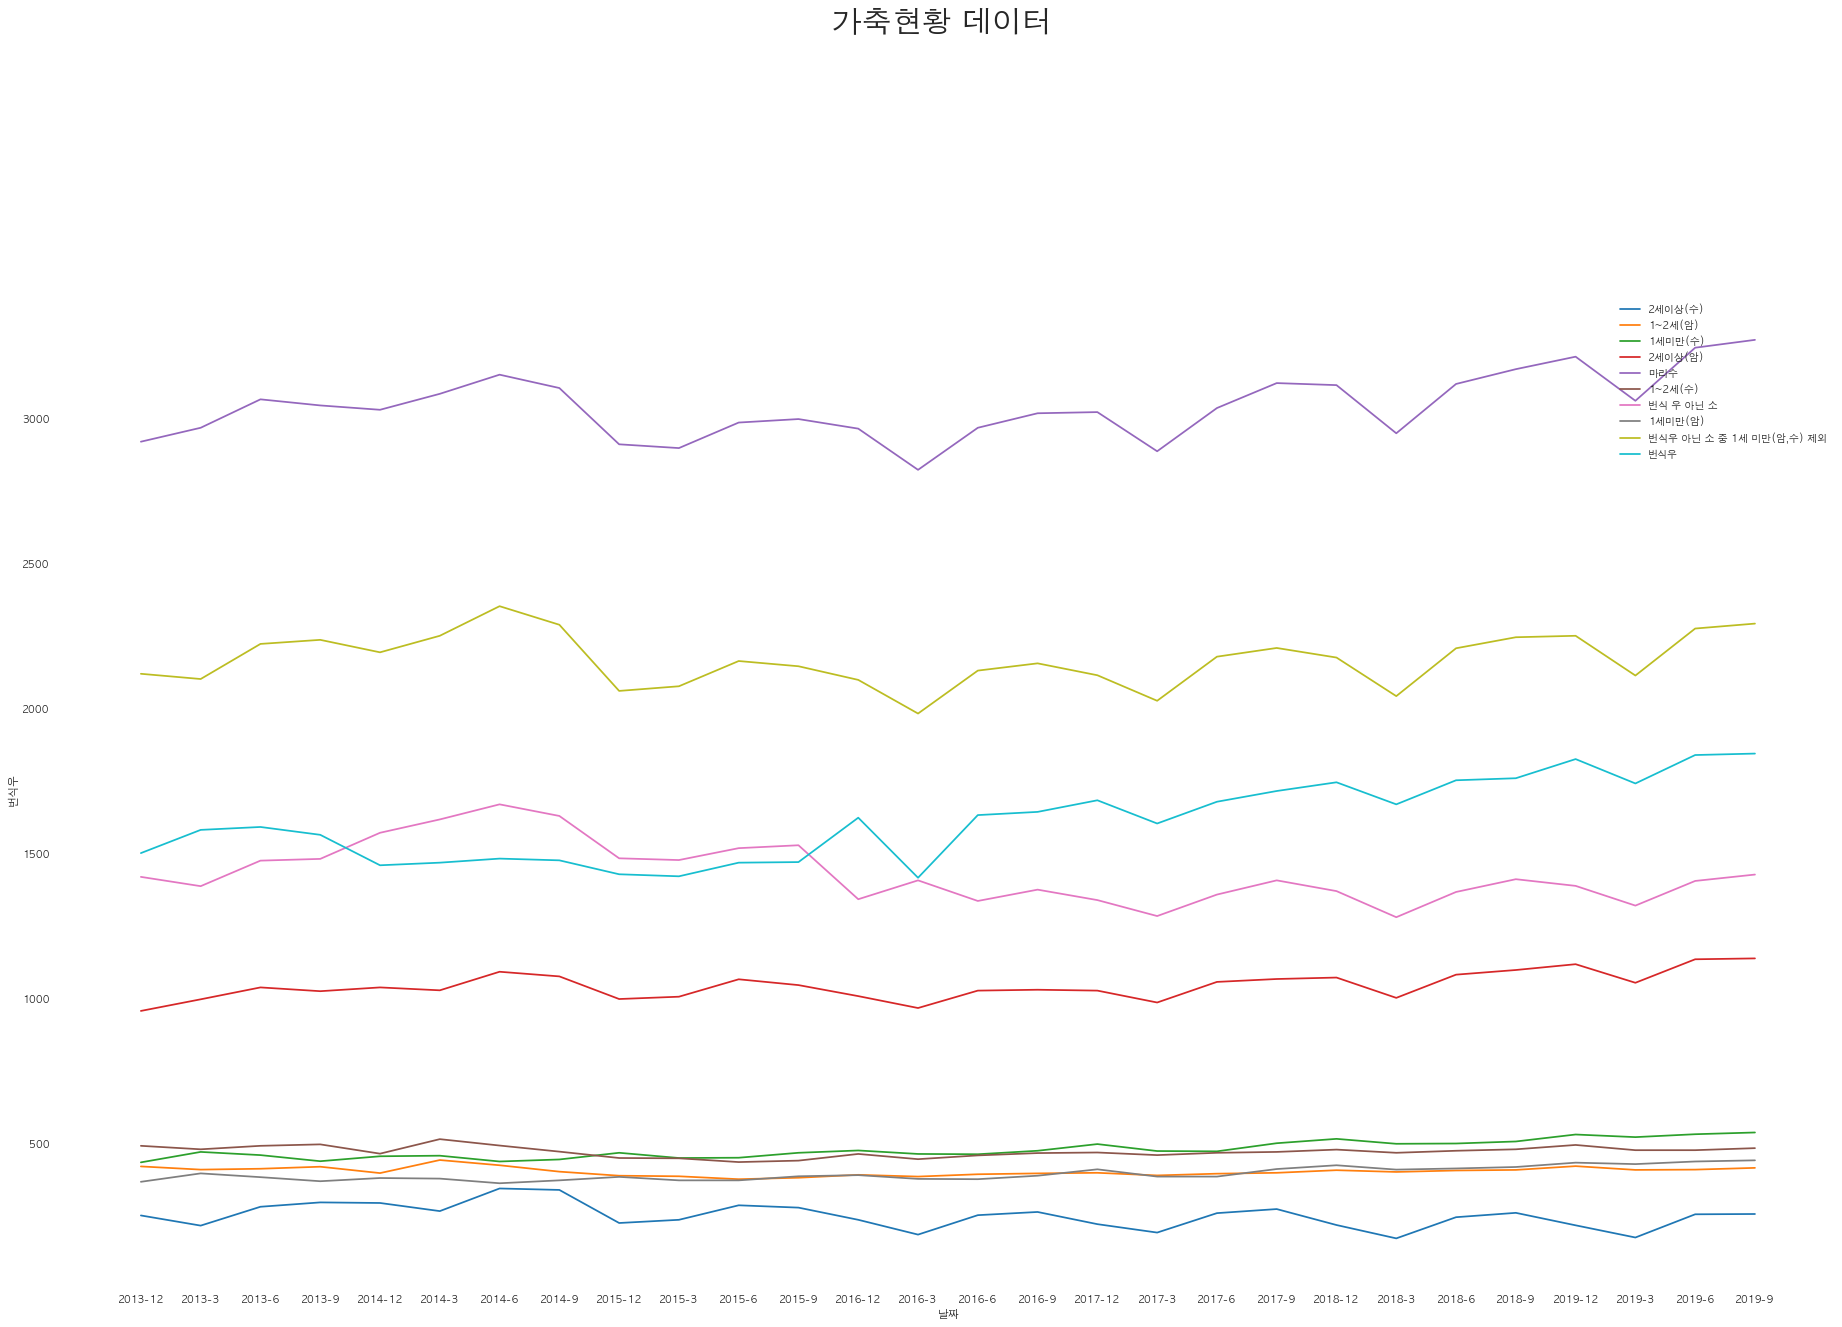

In [191]:
plt.figure(figsize=(70, 40))
plt.suptitle("가축현황 데이터", fontsize=30, x=0.3)
plt.subplot(2, 2, 1)

columns = list(set(status_df.columns) - set(["날짜", "연도", "월"]))

# plt.subplot(len(columns), 1, 1)
for c in columns:
    status_df[c] = status_df[c].astype("int")
    ax =sns.lineplot(x="날짜", y=f"{c}", data=status_df, legend="brief", label=c)

- 위 그래프의 경우 y 축 Range 값이 너무 크기 때문에 각각의 칼럼에 대한 시각화 진행

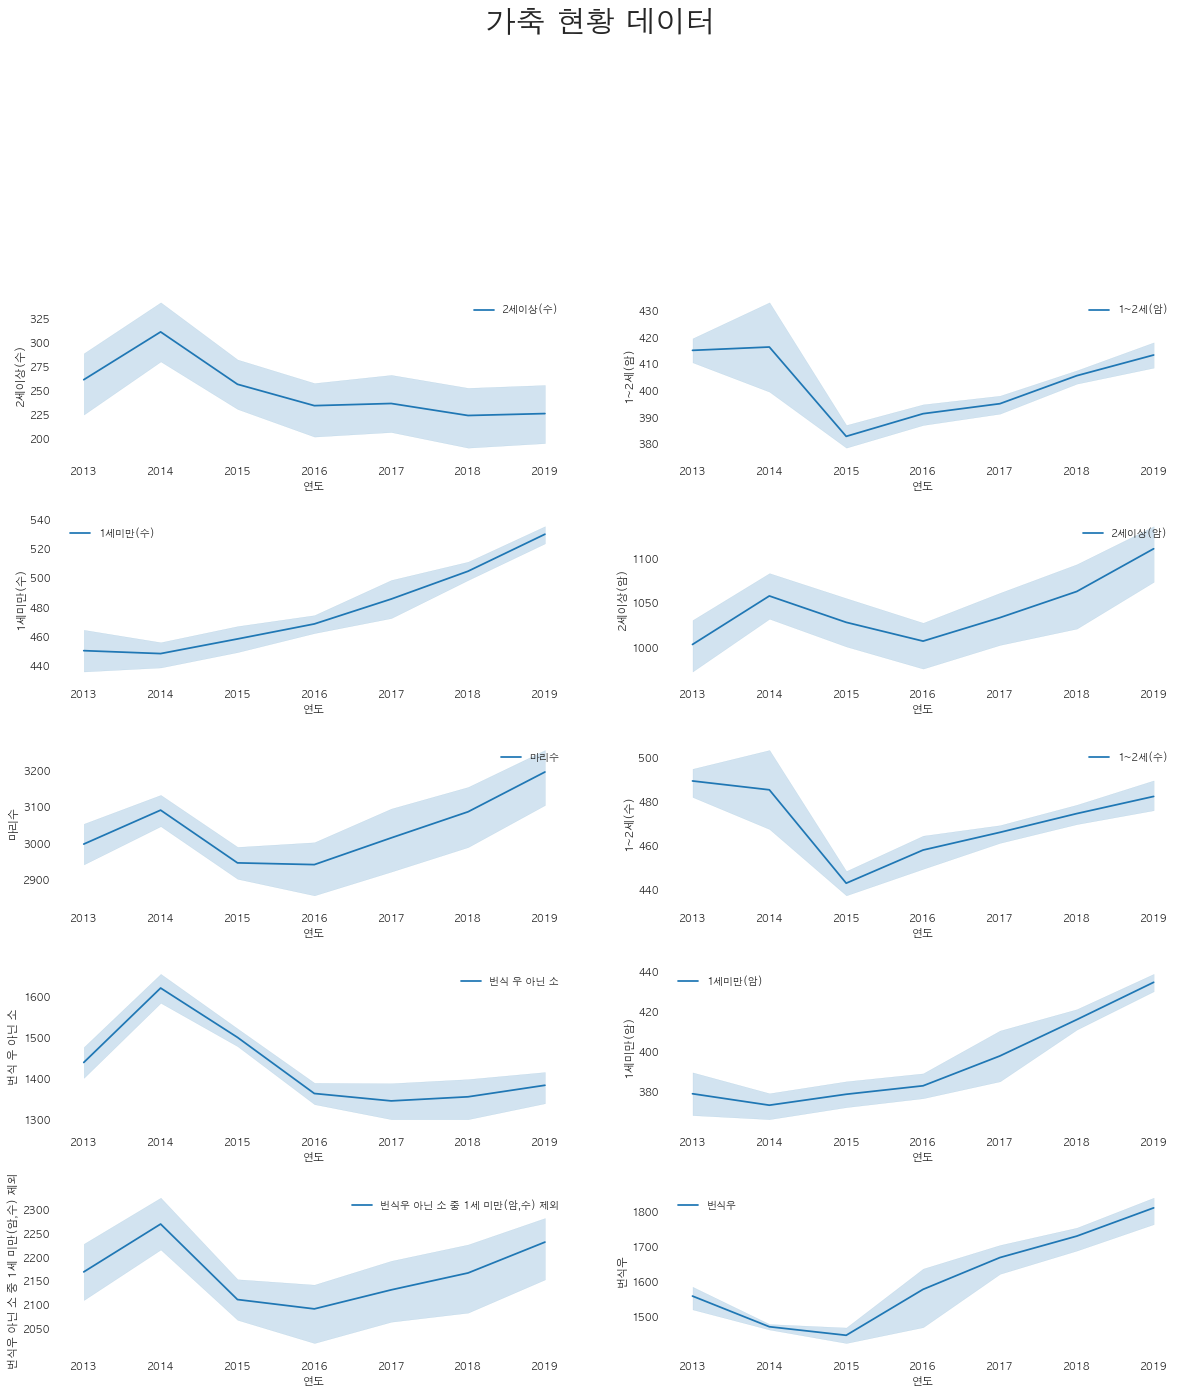

In [241]:
plt.figure(figsize=(20, 40))
plt.suptitle("가축 현황 데이터", fontsize=30, x=0.5)
plt.subplots_adjust(hspace=0.4, wspace=0.2)

for i, c in enumerate(columns):
    plt.subplot(len(columns), 2, i+1)
    status_df[c] = status_df[c].astype("int")
    sns.lineplot(x="연도", y=f"{c}", data=status_df, legend="brief", label=c)

### Check Data Distribution with plot
---

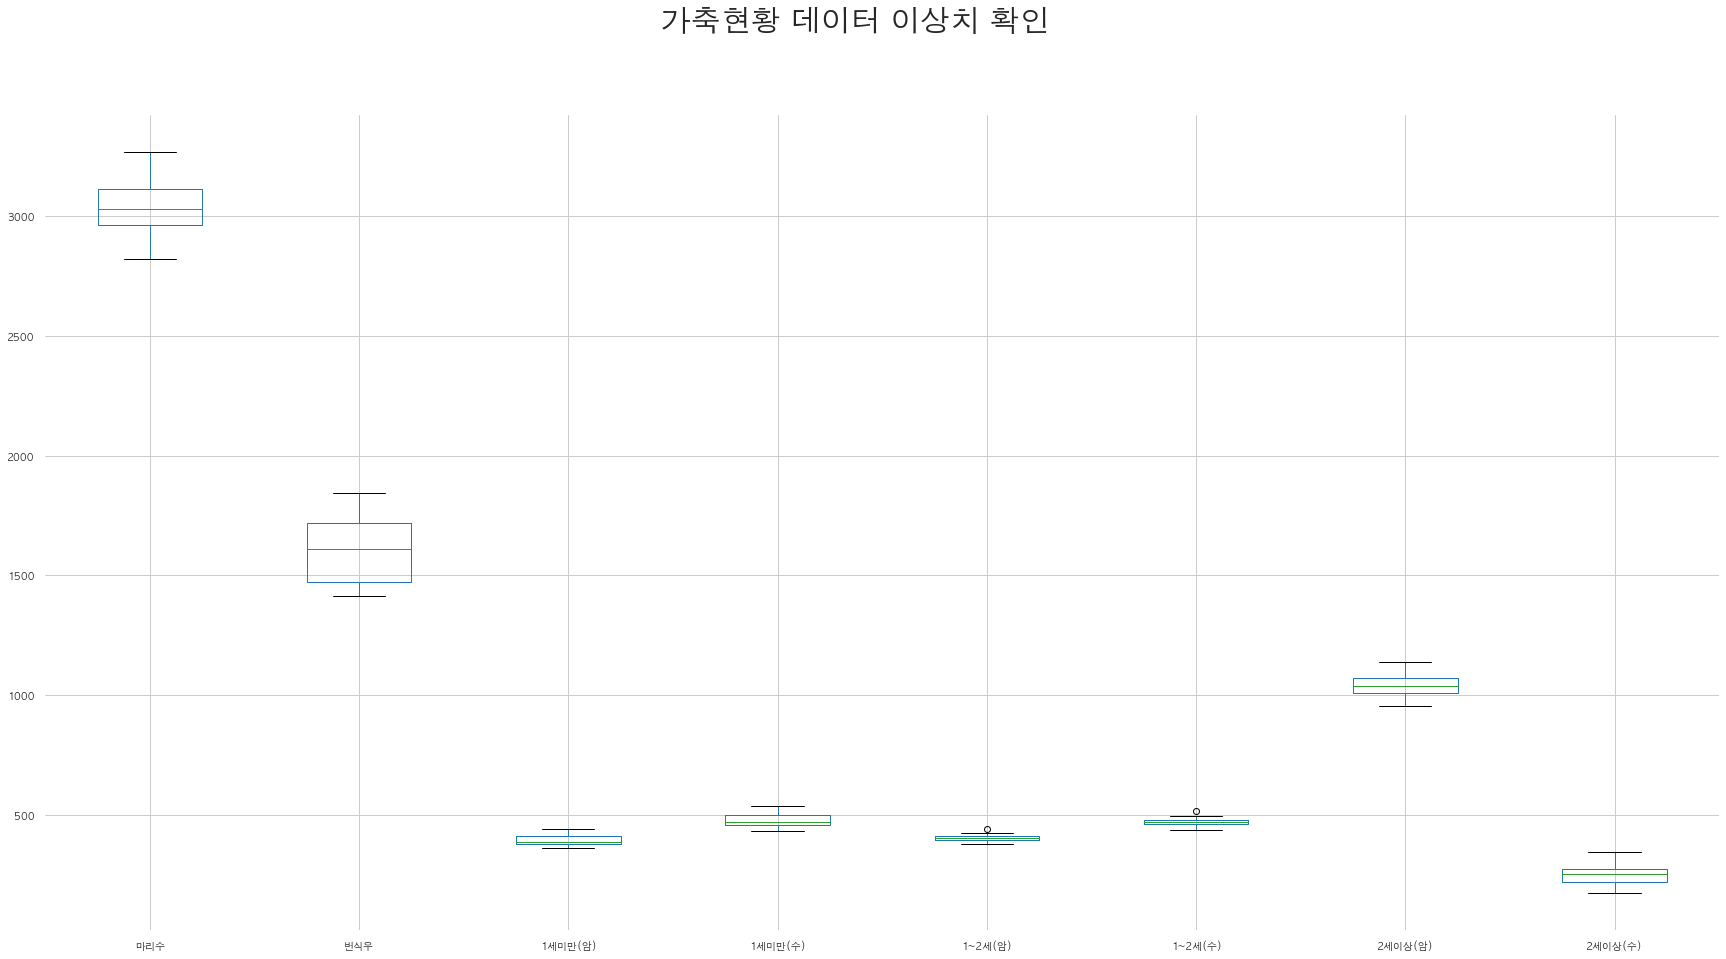

In [160]:
plt.figure(figsize=(30,15))
plt.suptitle("가축현황 데이터 이상치 확인", fontsize=30)
check_box_data = status_df.drop(["연도", "월", "날짜"], axis=1)
check_box_data.boxplot(figsize=(8,8))

이상치에 대해서 신경쓸 필요 없을 듯

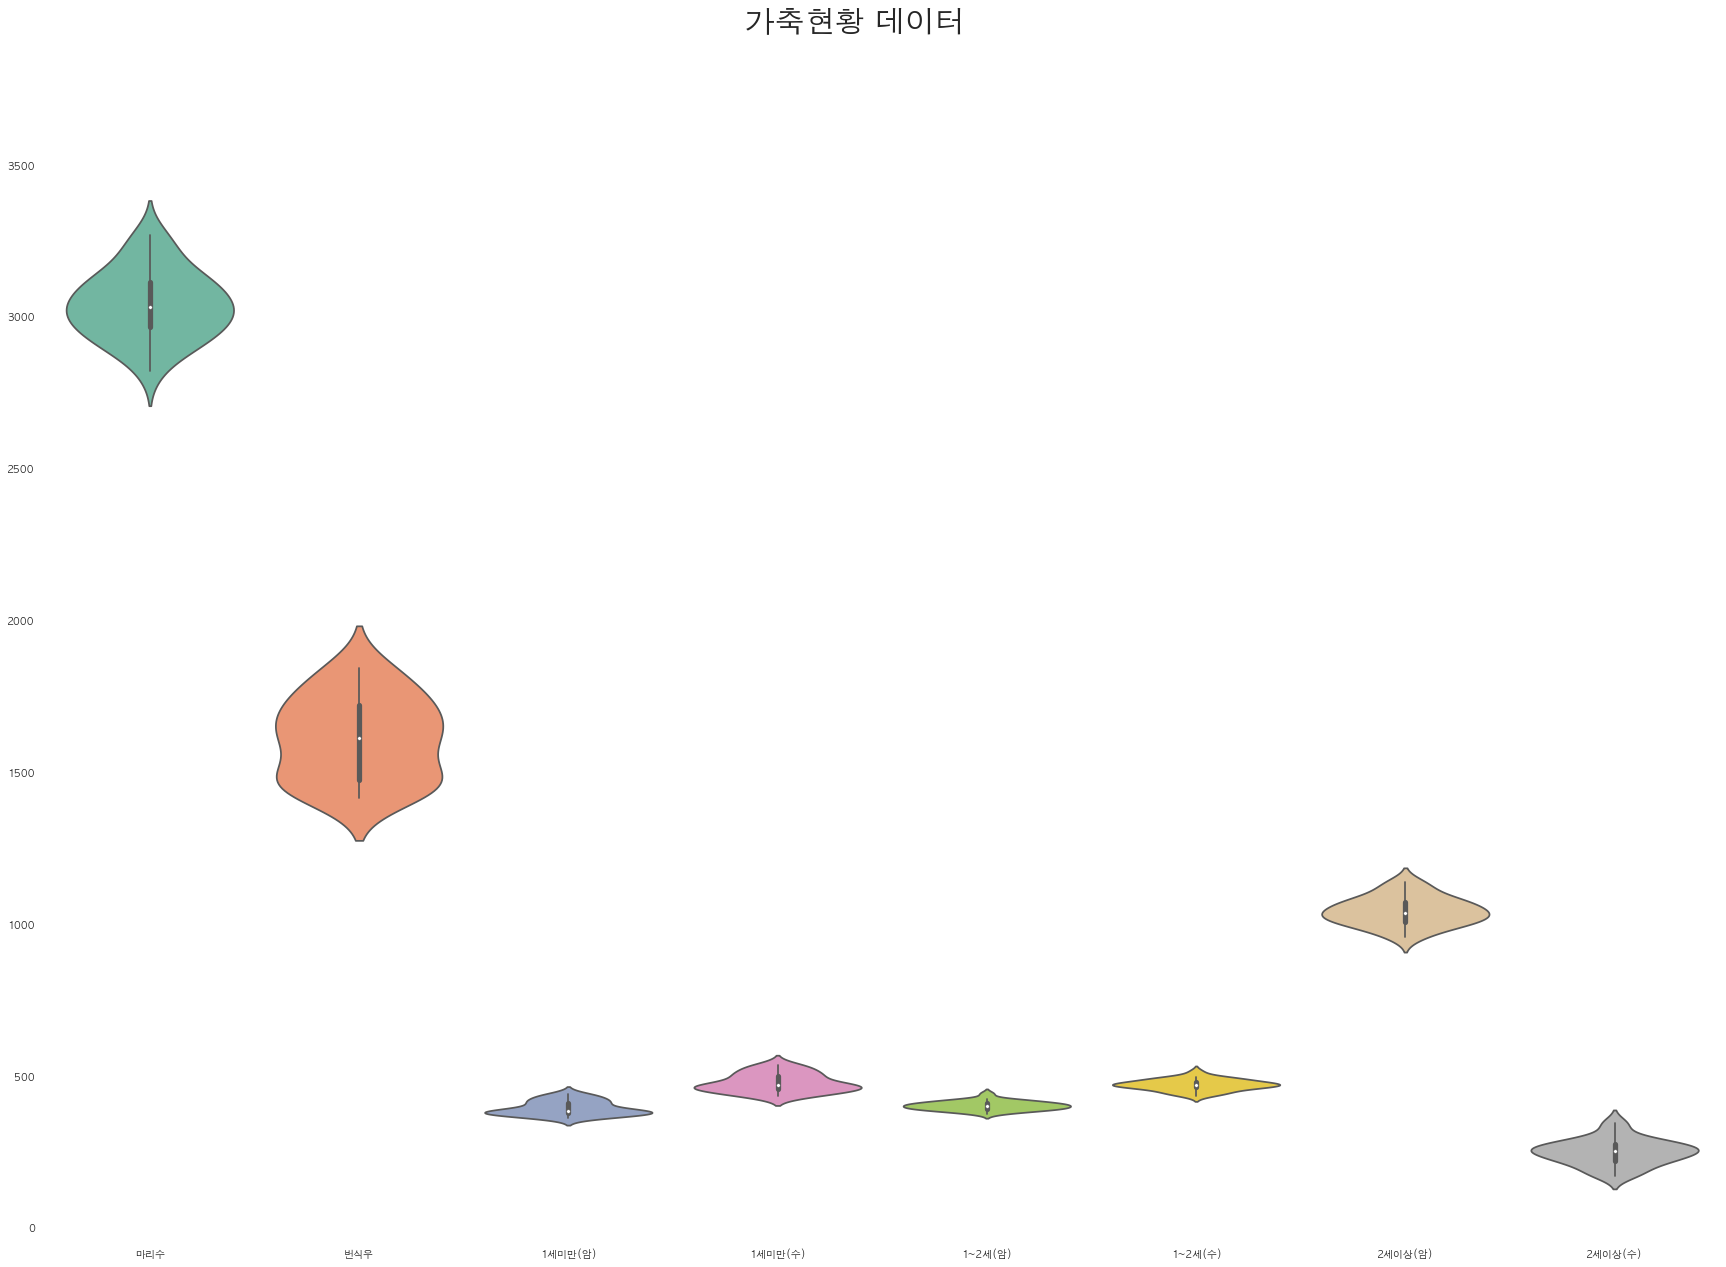

In [193]:
plt.figure(figsize=(30,20))
plt.suptitle("가축현황 데이터", fontsize=30)
ax = sns.violinplot(data=check_box_data, scale="width", palette="Set2")

In [194]:
sort_target_data["한우 평균경매 금액"]

34896    13203
34867    13743
34811    13945
34666    13470
34634    14040
         ...  
136      17108
121      18369
90       18757
85       17965
61       16612
Name: 한우 평균경매 금액, Length: 720, dtype: int64

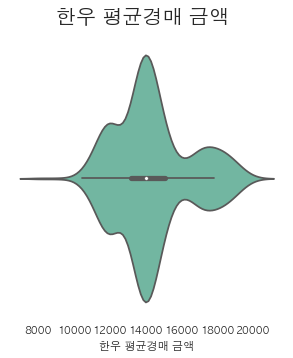

In [196]:
plt.figure(figsize=(5,5))
plt.suptitle("한우 평균경매 금액", fontsize=20)
ax = sns.violinplot(sort_target_data["한우 평균경매 금액"], palette="Set2")

대체로 정규분포의 형태를 보임

### Concat target & livestock status data
---

##### Y(평균한우가격)과 상관분석을 위한 data merging

- dataframe 공통된 "분기"칼럼 생성
- outer join으로 데이터 결합

In [197]:
def convert_quarter(month):
    if 1 <= month <= 3:
        return 1
    elif 3 < month <= 6:
        return 2
    elif 6 < month <= 9:
        return 3
    else:
        return 4

In [198]:
sort_target_data["연도"] = sort_target_data["경매시간"].apply(lambda x : str(x)[:4])
sort_target_data["분기"] = sort_target_data["경매시간"].apply(lambda x : convert_quarter(int(x[4:6])))
status_df["분기"] = status_df["월"].apply(lambda x : convert_quarter(int(x)))
print("====livestock status target data=====")
status_df.head()

====livestock status target data=====


,연도,월,마리수,번식우,1세미만(암),1세미만(수),1~2세(암),1~2세(수),2세이상(암),2세이상(수),날짜,번식 우 아닌 소,"번식우 아닌 소 중 1세 미만(암,수) 제외",분기
52,2013,3,2966,1580,396,470,409,479,996,216,2013-3,1386,2100,1
53,2013,6,3064,1590,383,459,412,491,1037,281,2013-6,1474,2221,2
54,2013,9,3043,1563,369,438,419,496,1024,296,2013-9,1480,2235,3
55,2013,12,2918,1500,367,434,420,491,956,251,2013-12,1418,2118,4
56,2014,3,3083,1467,378,457,442,514,1027,266,2014-3,1616,2249,1


In [199]:
print("====Check target data=====")
sort_target_data.head()

====Check target data=====


,경매시간,경매기준시분초,한우 평균경매 금액,연도,분기
34896,20130102,221544,13203,2013,1
34867,20130103,221545,13743,2013,1
34811,20130104,221545,13945,2013,1
34666,20130107,221547,13470,2013,1
34634,20130108,221548,14040,2013,1


In [200]:
merge_df = pd.merge(status_df, sort_target_data, on=["연도", "분기"], how="right")
merge_df["월"] = merge_df["경매시간"].apply(lambda x : str(x)[4:6])
merge_df[["연도", "월"]] = merge_df[["연도", "월"]].astype("int")
print("====Final Data Set Shape===")
merge_df.sort_values(by=["연도", "분기"])

====Final Data Set Shape===


,연도,월,마리수,번식우,1세미만(암),1세미만(수),1~2세(암),1~2세(수),2세이상(암),2세이상(수),날짜,번식 우 아닌 소,"번식우 아닌 소 중 1세 미만(암,수) 제외",분기,경매시간,경매기준시분초,한우 평균경매 금액
0,2013,1,2966,1580,396,470,409,479,996,216,2013-3,1386,2100,1,20130102,221544,13203
1,2013,1,2966,1580,396,470,409,479,996,216,2013-3,1386,2100,1,20130103,221545,13743
2,2013,1,2966,1580,396,470,409,479,996,216,2013-3,1386,2100,1,20130104,221545,13945
3,2013,1,2966,1580,396,470,409,479,996,216,2013-3,1386,2100,1,20130107,221547,13470
4,2013,1,2966,1580,396,470,409,479,996,216,2013-3,1386,2100,1,20130108,221548,14040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,2018,9,3168,1758,418,506,408,479,1097,260,2018-9,1410,2244,3,20180901,235902,17108
716,2018,9,3168,1758,418,506,408,479,1097,260,2018-9,1410,2244,3,20180905,235850,18369
717,2018,9,3168,1758,418,506,408,479,1097,260,2018-9,1410,2244,3,20180913,235926,18757
718,2018,9,3168,1758,418,506,408,479,1097,260,2018-9,1410,2244,3,20180917,235914,17965


In [201]:
"""
뻘짓의 흔정
# stauts_df data size fit
data = []
years = sort_target_data["연도"].unique()

for y in years:
    one_q = sort_target_data[(sort_target_data["연도"] == f"{y}") & (sort_target_data["월"] <= 3)] 
    two_q = sort_target_data[(sort_target_data["연도"] == f"{y}") & (sort_target_data["월"] > 3) & (sort_target_data["월"] <= 6)] 
    three_q = sort_target_data[(sort_target_data["연도"] == f"{y}") & (sort_target_data["월"] > 6) & (sort_target_data["월"] <= 9)] 
    four_q = sort_target_data[(sort_target_data["연도"] == f"{y}") & (sort_target_data["월"] > 9)] 
    

    print(f"data length : {len(data)}")

    data += [list(status_df[(status_df["연도"] == f"{y}") & (status_df["월"] == "3")].iloc[0])] * len(one_q)
    data += [list(status_df[(status_df["연도"] == f"{y}") & (status_df["월"] == "6")].iloc[0])] * len(two_q)
    data += [list(status_df[(status_df["연도"] == f"{y}") & (status_df["월"] == "9")].iloc[0])] * len(three_q)
    data += [list(status_df[(status_df["연도"] == f"{y}") & (status_df["월"] == "12")].iloc[0])] * len(four_q)

print(f"data length : {len(data)}")
df = pd.DataFrame(data, columns=status_df.columns)
"""

'\n뻘짓의 흔정\n# stauts_df data size fit\ndata = []\nyears = sort_target_data["연도"].unique()\n\nfor y in years:\n    one_q = sort_target_data[(sort_target_data["연도"] == f"{y}") & (sort_target_data["월"] <= 3)] \n    two_q = sort_target_data[(sort_target_data["연도"] == f"{y}") & (sort_target_data["월"] > 3) & (sort_target_data["월"] <= 6)] \n    three_q = sort_target_data[(sort_target_data["연도"] == f"{y}") & (sort_target_data["월"] > 6) & (sort_target_data["월"] <= 9)] \n    four_q = sort_target_data[(sort_target_data["연도"] == f"{y}") & (sort_target_data["월"] > 9)] \n    \n\n    print(f"data length : {len(data)}")\n\n    data += [list(status_df[(status_df["연도"] == f"{y}") & (status_df["월"] == "3")].iloc[0])] * len(one_q)\n    data += [list(status_df[(status_df["연도"] == f"{y}") & (status_df["월"] == "6")].iloc[0])] * len(two_q)\n    data += [list(status_df[(status_df["연도"] == f"{y}") & (status_df["월"] == "9")].iloc[0])] * len(three_q)\n    data += [list(status_df[(status_df["연도"] == f"{y}") & (stat

### Correlation 

In [238]:
def histogram_intersection(a, b):
    v = np.minimum(a, b).sum().round(decimals=1)
    return 

corr_data = merge_df.drop(["연도", "월", "분기"], axis=1)
corr = corr_data.corr()

corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,마리수,번식우,1세미만(암),1세미만(수),1~2세(암),1~2세(수),2세이상(암),2세이상(수),번식 우 아닌 소,"번식우 아닌 소 중 1세 미만(암,수) 제외",한우 평균경매 금액
마리수,1.00,0.22,0.01,0.03,0.41,0.44,0.89,0.74,0.60,0.92,-0.13
번식우,0.22,1.00,0.75,0.70,-0.02,0.09,0.13,-0.29,-0.65,-0.07,0.14
1세미만(암),0.01,0.75,1.00,0.97,-0.29,-0.24,0.03,-0.57,-0.61,-0.37,0.33
1세미만(수),0.03,0.70,0.97,1.00,-0.32,-0.30,0.10,-0.56,-0.55,-0.35,0.46
1~2세(암),0.41,-0.02,-0.29,-0.32,1.00,0.98,0.01,0.22,0.34,0.51,-0.47
1~2세(수),0.44,0.09,-0.24,-0.30,0.98,1.00,0.01,0.23,0.27,0.51,-0.54
2세이상(암),0.89,0.13,0.03,0.10,0.01,0.01,1.00,0.73,0.58,0.80,0.09
2세이상(수),0.74,-0.29,-0.57,-0.56,0.22,0.23,0.73,1.00,0.82,0.90,-0.23
번식 우 아닌 소,0.60,-0.65,-0.61,-0.55,0.34,0.27,0.58,0.82,1.00,0.78,-0.21
"번식우 아닌 소 중 1세 미만(암,수) 제외",0.92,-0.07,-0.37,-0.35,0.51,0.51,0.80,0.90,0.78,1.00,-0.28


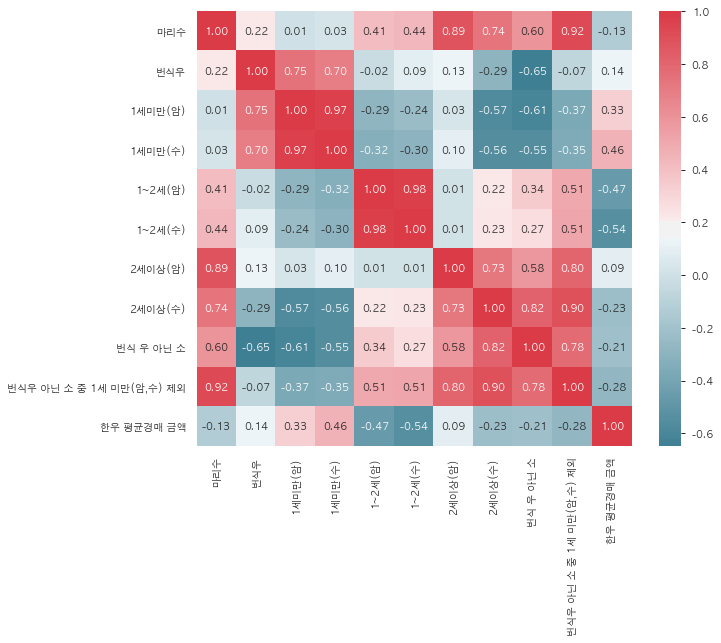

In [205]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, fmt=".2f", annot=True)

In [239]:
from pprint import pprint
ix = corr_data.corr().sort_values('한우 평균경매 금액', ascending=False).index
data = corr_data.corr().sort_values('한우 평균경매 금액', ascending=False)["한우 평균경매 금액"]

positive_features = {x: data[x] for x in ix if data[x] >= 0}
negative_features = {x: data[x] for x in ix if data[x] <= 0}

print("===Positive Correlation Features====\n")
pprint(positive_features)
print()
print("===Negative Correlation Features====\n")
pprint(negative_features)

===Positive Correlation Features====

{'1세미만(수)': 0.4600174159661704,
 '1세미만(암)': 0.3335568347471307,
 '2세이상(암)': 0.09194385668208421,
 '번식우': 0.13594276083891488,
 '한우 평균경매 금액': 1.0}

===Negative Correlation Features====

{'1~2세(수)': -0.5444711650151279,
 '1~2세(암)': -0.4676246940527496,
 '2세이상(수)': -0.22889122611165258,
 '마리수': -0.1321239497823748,
 '번식 우 아닌 소': -0.2149057272048471,
 '번식우 아닌 소 중 1세 미만(암,수) 제외': -0.2754146300789364}


### 결과 해석

---

- 1세미만 소 마리수 데이터와 약 0.33, 0.46의 양의 상관관계를 가짐.
- 1~2세 소 마리수 데이터와 약 0.46, 0.54의 음의 상관관계를 가짐.
- 도메인이 부족해 위의 결과에 대한 해석이 미흡하나 상관관계만 두고 보면 유의미한 관계를 도출했다고 볼 수 있음.